# Everything you need to know about: Data Visualization in Python

_The base article can be found on medium, titled [Complete Guide to Data Visualization with Python](https://towardsdatascience.com/complete-guide-to-data-visualization-with-python-2dd74df12b5e)_

Let's see the main libraries for data visualization with Python and all the types of charts that can be done with them. We will also see which library is recommended to use on each occasion and the unique capabilities of each library.

We will start with the most basic visualization that is looking at the data directly, then we will move on to plotting charts and finally, we will make interactive charts.

### Installation

This code block below should import all of the packages required and test to make sure they're ll installed correctly. If any errors occur, check install_override.md to see the commands to run directly in your terminal for similar results.

In [137]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install pandas_profiling
!{sys.executable} -m pip install bokeh

print("\n\nSuccessfully installed python packages!")

### Datasets

We will work with two datasets that will adapt to the visualizations we show in the workshop. The datasets are in the `datasets` directory in this repository, and the datasets can also be downloaded [here](https://github.com/albertsl/datasets/tree/master/popularidad).

The datasets are on the popularity of searches on the Internet for three terms related to artificial intelligence (data science, machine learning and deep learning). They have been extracted from a famous search engine.

There are two files `temporal.csv` and `mapa.csv`. The first one we will use in the vast majority of the tutorial includes popularity data of the three terms over time (from 2004 to the present, 2020). In addition, I have added a categorical variable (ones and zeros) to demonstrate the functionality of charts with categorical variables.

The file `mapa.csv` includes popularity data separated by country. We will use it in the last section of the article when working with maps.

## Pandas

Before we move on to more complex methods, let's start with the most basic way of visualizing data. We will simply use pandas to take a look at the data and get an idea of how it is distributed.

The first thing we must do is visualize a few examples to see what columns there are, what information they contain, how the values are coded, etc.

In [138]:
import pandas as pd
df = pd.read_csv('../datasets/temporal.csv')
df.head(10) #View first 10 data rows

,Mes,data science,machine learning,deep learning,categorical
0,2004-01-01,12,18,4,1
1,2004-02-01,12,21,2,1
2,2004-03-01,9,21,2,1
3,2004-04-01,10,16,4,1
4,2004-05-01,7,14,3,1
5,2004-06-01,9,17,3,1
6,2004-07-01,9,16,3,1
7,2004-08-01,7,14,3,1
8,2004-09-01,10,17,4,1
9,2004-10-01,8,17,4,1


With the command `describe` we will see how the data is distributed, the maximums, the minimums, the mean, etc.

In [139]:
df.describe()

,data science,machine learning,deep learning,categorical
count,194.000000,194.000000,194.000000,194.000000
mean,20.953608,27.396907,24.231959,0.257732
std,23.951006,28.091490,34.476887,0.438517
min,4.000000,7.000000,1.000000,0.000000
25%,6.000000,9.000000,2.000000,0.000000
50%,8.000000,13.000000,3.000000,0.000000
75%,26.750000,31.500000,34.000000,1.000000
max,100.000000,100.000000,100.000000,1.000000


With the `info` command we will see what type of data each column includes. We could find the case of a column that when viewed with the head command seems numeric but if we look at subsequent data there are values in string format, then the variable will be coded as a string.

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Mes               194 non-null    object
 1   data science      194 non-null    int64 
 2   machine learning  194 non-null    int64 
 3   deep learning     194 non-null    int64 
 4   categorical       194 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.7+ KB


By default, pandas limits the number of rows and columns it displays. This, among other things in Pandas, is modifiable. Here we set the max higher to allow us to see everything at once.

With these commands, we increase the limits and we can visualize the whole data. Be careful with this option for big datasets, we can have problems showing them.

In [141]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

See the data now:

In [142]:
df

,Mes,data science,machine learning,deep learning,categorical
0,2004-01-01,12,18,4,1
1,2004-02-01,12,21,2,1
2,2004-03-01,9,21,2,1
3,2004-04-01,10,16,4,1
4,2004-05-01,7,14,3,1
5,2004-06-01,9,17,3,1
6,2004-07-01,9,16,3,1
7,2004-08-01,7,14,3,1
8,2004-09-01,10,17,4,1
9,2004-10-01,8,17,4,1


Using Pandas styles, we can get much more information when viewing the table. First, we define a format dictionary so that the numbers are shown in a legible way (with a certain number of decimals, date and hour in a relevant format, with a percentage, with a currency, etc.) Don’t panic, this is only a display and does not change the data, you will not have any problem to process it later.

To give an example of each type, here there are currency and percentage symbols even though they do not make any sense for this data.

In [143]:
format_dict = {'data science':'${0:,.2f}', 'Mes':'{:%m-%Y}', 'machine learning':'{:.2%}'}
#We make sure that the Month column has datetime format
df['Mes'] = pd.to_datetime(df['Mes'])
#We apply the style to the visualization
df.head().style.format(format_dict)

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,$12.00,1800.00%,4,1
1,02-2004,$12.00,2100.00%,2,1
2,03-2004,$9.00,2100.00%,2,1
3,04-2004,$10.00,1600.00%,4,1
4,05-2004,$7.00,1400.00%,3,1


We can highlight maximum and minimum values with colors too:

In [144]:
format_dict = {'Mes':'{:%m-%Y}'} #Simplified format dictionary with values that do make sense for our data
df.head().style.format(format_dict).highlight_max(color='green').highlight_min(color='#ff0000')

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1


We use a color gradient to display the data values.

In [145]:
df.head(10).style.format(format_dict).background_gradient(subset=['data science', 'machine learning'], cmap='BuGn')

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1
5,06-2004,9,17,3,1
6,07-2004,9,16,3,1
7,08-2004,7,14,3,1
8,09-2004,10,17,4,1
9,10-2004,8,17,4,1


We can also display the data values with bars:

In [146]:
df.head().style.format(format_dict).bar(color='red', subset=['data science', 'deep learning'])

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1


Moreover, we also can combine the above functions and generate a more complex visualization.

In [147]:
df.head(10).style.format(format_dict).background_gradient(subset=['data science', 'machine learning'], cmap='BuGn').highlight_max(color='yellow')

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1
5,06-2004,9,17,3,1
6,07-2004,9,16,3,1
7,08-2004,7,14,3,1
8,09-2004,10,17,4,1
9,10-2004,8,17,4,1


There is plenty more to learn about styling visualizations with Pandas here: https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

All of these are for your convenience when working, as some datasets will lend themselves better to certain settings and features here.

### Pandas Profiling
Pandas profiling is a library that generates interactive reports with our data, we can see the distribution of the data, the types of data, possible problems it might have. It is very easy to use, with only 3 lines we can generate a report that we can send to anyone and that can be used even if you do not know programming.

In [148]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='report.html')

You can see the interactive report as a web page generated from the data used in the article, [here](https://todoia.es/recursos/informe.html).

You can find more information about Pandas Profiling in [this article](https://towardsdatascience.com/exploratory-data-analysis-with-pandas-profiling-de3aae2ddff3). This package is best used if you're not an engineer or work mostly with non-engineers, so we will move on here. 

## Matplotlib

Matplotlib is the most basic library for visualizing data graphically. It includes many of the graphs that we can think of. Just because it is basic does not mean that it is not powerful, many of the other data visualization libraries we are going to talk about are based on it.

Matplotlib charts are made up of two main components, the axes (the lines that delimit the area of the chart) and the figure (where we draw the axes, titles and things that come out of the area of the axes). Now let’s create the simplest graph possible:

_note: The parameter label is to indicate the legend. This doesn't mean that it will be shown, we'll have to use another command that I'll explain later_

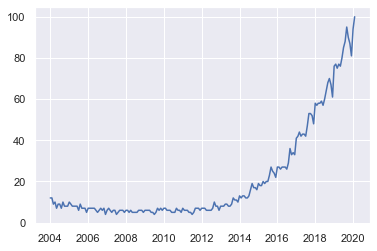

In [149]:
import matplotlib.pyplot as plt
plt.plot(df['Mes'], df['data science'], label='data science')

We can make graphs with multiple variables in the same plot to compare them.

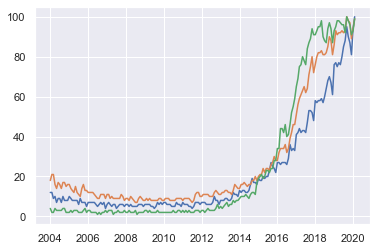

In [150]:
plt.plot(df['Mes'], df['data science'], label='data science')
plt.plot(df['Mes'], df['machine learning'], label='machine learning')
plt.plot(df['Mes'], df['deep learning'], label='deep learning')

It is not very clear which variable each color represents. We’re going to improve the chart by adding a legend and titles.

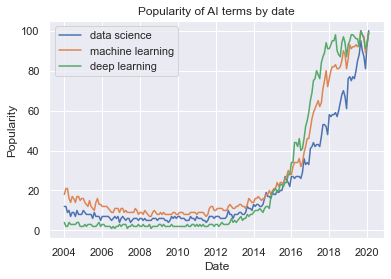

In [151]:
plt.plot(df['Mes'], df['data science'], label='data science')
plt.plot(df['Mes'], df['machine learning'], label='machine learning')
plt.plot(df['Mes'], df['deep learning'], label='deep learning')
plt.xlabel('Date')
plt.ylabel('Popularity')
plt.title('Popularity of AI terms by date')
plt.grid(True)
plt.legend()

If you are looking to run the chart in a separate window, comment in the code below and run it instead. This is not required but may be preferred if you want to save the image of the plot to your computer.

In [152]:
# %matplotlib
# plt.plot(df['Mes'], df['data science'], label='data science')
# plt.plot(df['Mes'], df['machine learning'], label='machine learning')
# plt.plot(df['Mes'], df['deep learning'], label='deep learning')
# plt.xlabel('Date')
# plt.ylabel('Popularity')
# plt.title('Popularity of AI terms by date')
# plt.grid(True)
# plt.legend()

We can make multiple graphics in one figure. This goes very well for comparing charts or for sharing data from several types of charts easily with a single image.

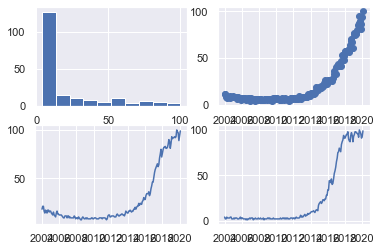

In [153]:
fig, axes = plt.subplots(2,2)
axes[0, 0].hist(df['data science'])
axes[0, 1].scatter(df['Mes'], df['data science'])
axes[1, 0].plot(df['Mes'], df['machine learning'])
axes[1, 1].plot(df['Mes'], df['deep learning'])

We can draw the graph with different styles for the points of each variable:

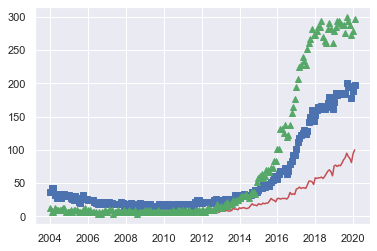

In [154]:
plt.plot(df['Mes'], df['data science'], 'r-')
plt.plot(df['Mes'], df['machine learning']*2, 'bs')
plt.plot(df['Mes'], df['deep learning']*3, 'g^')

Now let’s see a few examples of the different graphics we can do with Matplotlib. We start with a scatterplot:


Now let’s see a few examples of the different graphics we can do with Matplotlib. We start with a scatterplot:

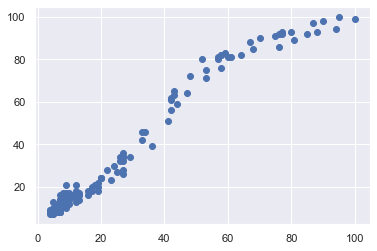

In [155]:
plt.scatter(df['data science'], df['machine learning'])

Bar charts too:

<BarContainer object of 194 artists>

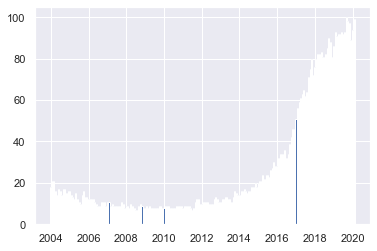

In [156]:
plt.bar(df['Mes'], df['machine learning'], width=20)

And let's look at some Histograms:

(array([117.,  14.,   5.,   6.,   2.,   3.,   6.,   1.,   2.,   1.,   1.,
          5.,   1.,  13.,  17.]),
 array([  1. ,   7.6,  14.2,  20.8,  27.4,  34. ,  40.6,  47.2,  53.8,
         60.4,  67. ,  73.6,  80.2,  86.8,  93.4, 100. ]),
 <a list of 15 Patch objects>)

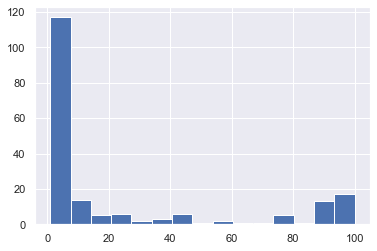

In [157]:
plt.hist(df['deep learning'], bins=15)

Gallery of examples:

In this link: https://matplotlib.org/gallery/index.html we can see examples of all types of graphics that can be made with Matplotlib.

## Seaborn
Seaborn is a library based on Matplotlib. It specializes to give us are nicer graphics and functions to make complex types of graphics with just one line of code.

We import the library and initialize the style of the graphics with `sns.set()`, without this command the graphics would still have the same style as Matplotlib. We show one of the simplest graphics, a scatterplot

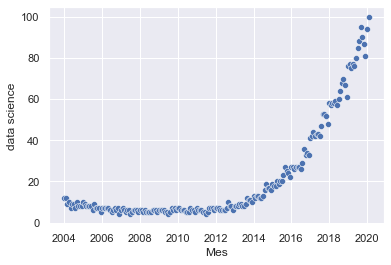

In [158]:
import seaborn as sns
sns.set()
sns.scatterplot(x=df['Mes'], y=df['data science'])

We can add information of more than two variables in the same graph. For this we use colors and sizes. We also make a different graph according to the value of the category column:

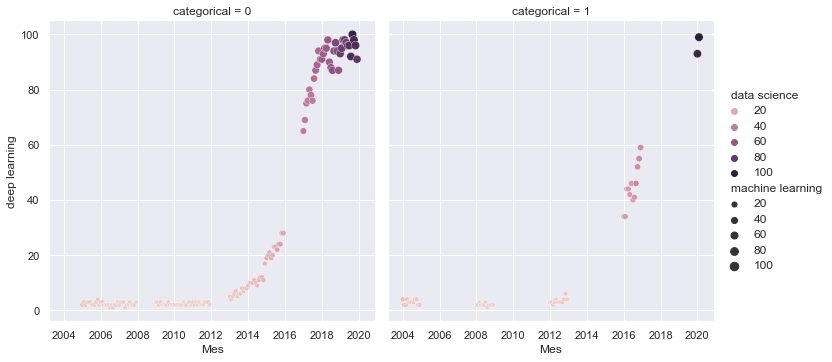

In [159]:
sns.relplot(x='Mes', y='deep learning', hue='data science', size='machine learning', col='categorical', data=df)

One of the most popular graphics provided by Seaborn is the heatmap. It is very common to use it to show all the correlations between variables in a dataset:

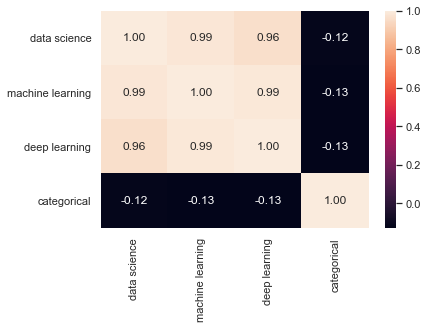

In [160]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')

Another of the most popular is the pairplot that shows us the relationships between all the variables. Be careful with this function if you have a large dataset, as it has to show all the data points as many times as there are columns, it means that by increasing the dimensionality of the data, the processing time increases exponentially.

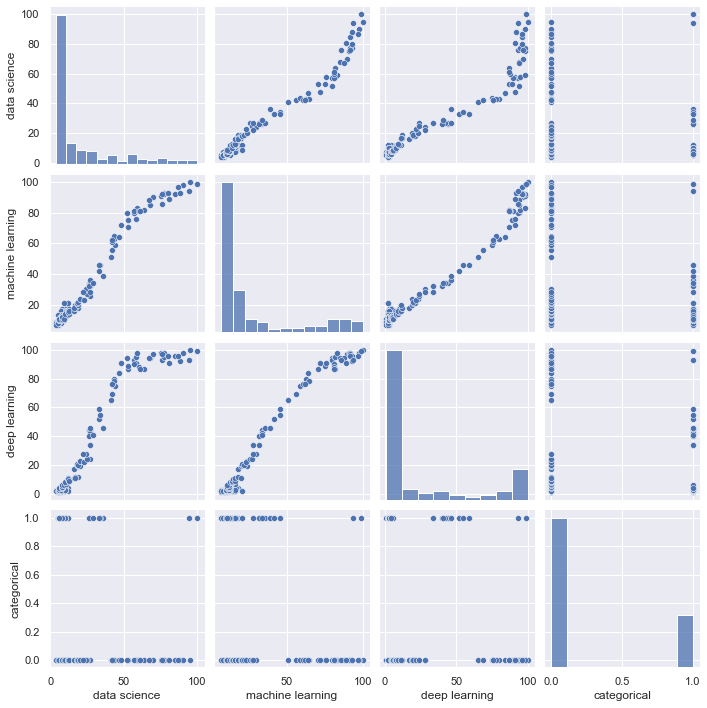

In [161]:
sns.pairplot(df)

Now let’s do the pairplot showing the charts segmented according to the values of the _categorical_ variable. This allows yo to see the comparisons from before with the categorical value overlaid.

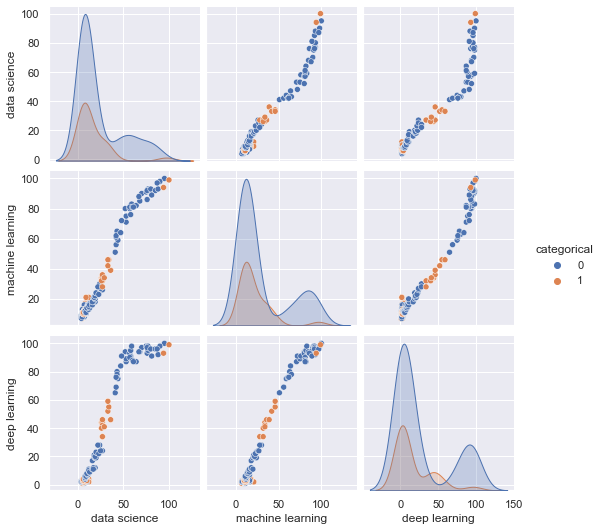

In [162]:
sns.pairplot(df, hue='categorical')

A very informative graph is the jointplot that allows us to see a scatterplot together with a histogram of the two variables and see how they are distributed:

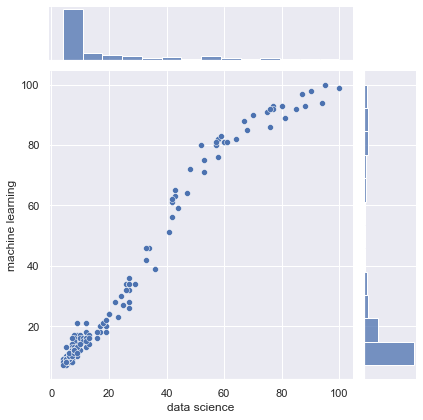

In [163]:
sns.jointplot(x='data science', y='machine learning', data=df)

Another interesting graphic is the ViolinPlot to show distributions next to values at the same time:

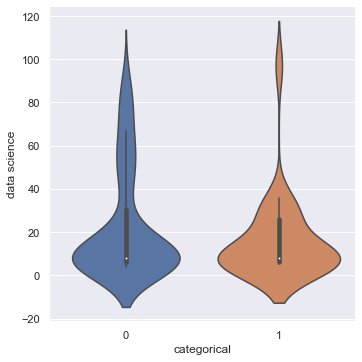

In [164]:
sns.catplot(x='categorical', y='data science', kind='violin', data=df)

We can create multiple graphics in one image just like we did with Matplotlib:

Text(0.5, 1.0, 'Machine Learning')

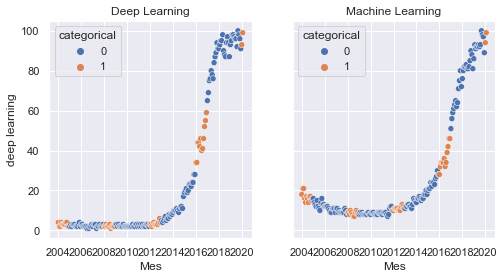

In [165]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(8, 4))
sns.scatterplot(x="Mes", y="deep learning", hue="categorical", data=df, ax=axes[0])
axes[0].set_title('Deep Learning')
sns.scatterplot(x="Mes", y="machine learning", hue="categorical", data=df, ax=axes[1])
axes[1].set_title('Machine Learning')

Gallery of examples:
In [this link](https://seaborn.pydata.org/examples/index.html), we can see examples of everything that can be done with Seaborn.

## Bokeh
Bokeh is a library that allows you to generate interactive graphics. We can export them to an HTML document that we can share with anyone who has a web browser.

It is a very useful library when we are interested in looking for things in the graphics and we want to be able to zoom in and move around the graphic. Or when we want to share them and give the possibility to explore the data to another person.

We start by importing the library and defining the file in which we will save the graph:

In [166]:
from bokeh.plotting import figure, output_file, save, gridplot
output_file('data_science_popularity.html')

We draw what we want and save it on the file:

In [167]:
p = figure(title='data science', x_axis_label='Mes', y_axis_label='data science')
p.line(df['Mes'], df['data science'], legend_label='popularity', line_width=2)
save(p)

TemplateNotFound: try_run.js

You can see how the file data_science_popularity.html looks by clicking [here](https://todoia.es/recursos/data_science_popularity.html). It’s interactive, you can move around the graphic and zoom in as you like

Adding multiple graphics to a single file:

In [ ]:
output_file('multiple_graphs.html')
s1 = figure(width=250, plot_height=250, title='data science')
s1.circle(df['Mes'], df['data science'], size=10, color='navy', alpha=0.5)
s2 = figure(width=250, height=250, x_range=s1.x_range, y_range=s1.y_range, title='machine learning') #share both axis range
s2.triangle(df['Mes'], df['machine learning'], size=10, color='red', alpha=0.5)
s3 = figure(width=250, height=250, x_range=s1.x_range, title='deep learning') #share only one axis range
s3.square(df['Mes'], df['deep learning'], size=5, color='green', alpha=0.5)
p = gridplot([[s1, s2, s3]])
save(p)

You can see how the file multiple_graphs.html looks by clicking [here](https://todoia.es/recursos/multiple_graphs.html).

Gallery of examples:
In this link https://docs.bokeh.org/en/latest/docs/gallery.html you can see examples of everything that can be done with Bokeh.